<a href="https://colab.research.google.com/github/Tbharvesh/DeepLearning/blob/main/Fasion_MNIST_Dataset_~_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=tf.keras.datasets.fashion_mnist
data

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

## Loading the MNIST dataset

In [ ]:
(train_images,train_labels),(test_images,test_labels)=data.load_data()  #X_train,y_train   X_test , y_test

In [ ]:
train_images[0]
print(type(train_images))
train_images.shape
test_images.shape

<class 'numpy.ndarray'>


(10000, 28, 28)

## Data Preprocessing

In [ ]:
test_images=test_images.reshape(10000,784)
train_images=train_images.reshape(60000,784)

train_images = train_images/255.0
test_images =test_images/255.0

test_images = test_images.astype('float32')
train_images = train_images.astype('float32')

# One hot encoding --labels
train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)  # converts 10 classes into arrays of 0 and 1


print(test_images.shape,"test samples")
print(train_images.shape,"train samples")
print("Y_train(train_labels) : ",train_labels)
print("Y_test(test_labels) : ",test_labels)

(10000, 784) test samples
(60000, 784) train samples
Y_train(train_labels) :  [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y_test(test_labels) :  [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model0 =Sequential()
model0.add(Dense(10,input_shape=(784,),name='dense_layer',activation='softmax'))

In [ ]:
# Compiling model
model0.compile(optimizer='SGD',
               loss='categorical_crossentropy',
               metrics=['accuracy']
)

In [ ]:
training=model0.fit(train_images,train_labels,batch_size=64,epochs=70,validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 3s 3ms/step - loss: 0.5852 - accuracy: 0.8015 - val_loss: 0.5825 - val_accuracy: 0.7989
Epoch 2/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5852 - accuracy: 0.8015 - val_loss: 0.5825 - val_accuracy: 0.7987
Epoch 3/70
750/750 [==============================] - 3s 4ms/step - loss: 0.5852 - accuracy: 0.8015 - val_loss: 0.5825 - val_accuracy: 0.7988
Epoch 4/70
750/750 [==============================] - 3s 4ms/step - loss: 0.5852 - accuracy: 0.8015 - val_loss: 0.5825 - val_accuracy: 0.7987
Epoch 5/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5852 - accuracy: 0.8014 - val_loss: 0.5825 - val_accuracy: 0.7987
Epoch 6/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5852 - accuracy: 0.8015 - val_loss: 0.5825 - val_accuracy: 0.7986
Epoch 7/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5852 - accuracy: 0.8014 - val_loss: 0.5825 - val_accuracy: 0.7987
Epoch 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


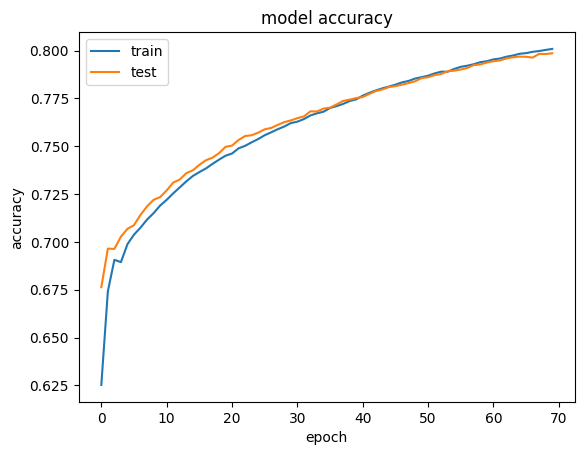

In [ ]:
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
test_loss,test_accuracy = model0.evaluate(test_images,test_labels)
print("Test Accuracy: ",test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.6015 - accuracy: 0.7926
Test Accuracy:  0.7925999760627747


In [ ]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Improved Model 2- Adding Droupout to avoide overfitting

In [ ]:
from tensorflow.keras.layers import Dropout
model2 = tf.keras.Sequential()
hidden=128
model2.add(Dense(hidden,name='dense_layer',input_shape=(784,),activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(hidden,name='dense_layer_2',activation='relu'))
model2.add(Dropout(0.3))
# Add an output layer with 10 outpiutrs(10 classes)
model2.add(Dense(10,name='dense_layer_3',activation='softmax'))

In [ ]:
model2.compile(optimizer='SGD',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
training=model2.fit(train_images,train_labels,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 6s 7ms/step - loss: 2.3007 - accuracy: 0.1350 - val_loss: 2.3004 - val_accuracy: 0.1292
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 2.3003 - accuracy: 0.1377 - val_loss: 2.3000 - val_accuracy: 0.2307
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 2.2998 - accuracy: 0.1383 - val_loss: 2.2997 - val_accuracy: 0.1438
Epoch 4/50
750/750 [==============================] - 5s 6ms/step - loss: 2.2996 - accuracy: 0.1381 - val_loss: 2.2993 - val_accuracy: 0.1898
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 2.2993 - accuracy: 0.1548 - val_loss: 2.2990 - val_accuracy: 0.1468
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 2.2989 - accuracy: 0.1449 - val_loss: 2.2987 - val_accuracy: 0.1972
Epoch 7/50
750/750 [==============================] - 4s 6ms/step - loss: 2.2985 - accuracy: 0.1507 - val_loss: 2.2982 - val_accuracy: 0.1709
Epoch 

In [ ]:
test_loss,test_accuracy = model2.evaluate(test_images,test_labels)
print("Test Accuracy: ",test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.4485 - accuracy: 0.5101
Test Accuracy:  0.5101000070571899


In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Improves Model 3 : Adam Optimizer

In [ ]:
model3 = tf.keras.Sequential()
hidden=64
model3.add(Dense(hidden,name='dense_layer',input_shape=(784,),activation='relu'))
model3.add(Dropout(0.3))

model3.add(Dense(hidden,name='dense_layer_2',activation='relu'))
model3.add(Dropout(0.3))
# Add an output layer with 10 outpiutrs(10 classes)
model3.add(Dense(10,name='dense_layer_3',activation='softmax'))

In [ ]:
model3.compile(optimizer='Adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
training=model3.fit(train_images,train_labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 5s 9ms/step - loss: 1.5942 - accuracy: 0.4039 - val_loss: 1.0363 - val_accuracy: 0.6028
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 1.0304 - accuracy: 0.5994 - val_loss: 0.7969 - val_accuracy: 0.7355
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.8561 - accuracy: 0.6808 - val_loss: 0.6839 - val_accuracy: 0.7506
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.7659 - accuracy: 0.7134 - val_loss: 0.6330 - val_accuracy: 0.7688
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.7115 - accuracy: 0.7356 - val_loss: 0.5961 - val_accuracy: 0.7713
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6741 - accuracy: 0.7490 - val_loss: 0.5671 - val_accuracy: 0.7854
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6425 - accuracy: 0.7619 - val_loss: 0.5421 - val_accuracy: 0.7924
Epoch 

In [ ]:
test_loss,test_accuracy = model3.evaluate(test_images,test_labels)
print("Test Accuracy: ",test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4476 - accuracy: 0.8353
Test Accuracy:  0.8353000283241272


In [ ]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 64)                50240     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.get_config()

{'name': 'sequential_6',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build

## Improved Model 4:Increasing no. of hidden layer neurons

In [ ]:
model4 = tf.keras.Sequential()
hidden=512
model4.add(Dense(hidden,name='dense_layer',input_shape=(784,),activation='relu'))
model4.add(Dropout(0.3))

model4.add(Dense(hidden,name='dense_layer_2',activation='relu'))
model4.add(Dropout(0.3))
# Add an output layer with 10 outpiutrs(10 classes)
model4.add(Dense(10,name='dense_layer_3',activation='softmax'))

In [ ]:
model4.compile(optimizer='Adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
training=model4.fit(train_images,train_labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 16s 35ms/step - loss: 0.9864 - accuracy: 0.6417 - val_loss: 0.6165 - val_accuracy: 0.7719
Epoch 2/20
375/375 [==============================] - 13s 35ms/step - loss: 0.5968 - accuracy: 0.7799 - val_loss: 0.5280 - val_accuracy: 0.8058
Epoch 3/20
375/375 [==============================] - 14s 38ms/step - loss: 0.5200 - accuracy: 0.8105 - val_loss: 0.4680 - val_accuracy: 0.8307
Epoch 4/20
375/375 [==============================] - 13s 35ms/step - loss: 0.4752 - accuracy: 0.8289 - val_loss: 0.4355 - val_accuracy: 0.8411
Epoch 5/20
375/375 [==============================] - 12s 33ms/step - loss: 0.4410 - accuracy: 0.8397 - val_loss: 0.4219 - val_accuracy: 0.8449
Epoch 6/20
375/375 [==============================] - 12s 32ms/step - loss: 0.4218 - accuracy: 0.8467 - val_loss: 0.4038 - val_accuracy: 0.8494
Epoch 7/20
375/375 [==============================] - 11s 29ms/step - loss: 0.4029 - accuracy: 0.8534 - val_loss: 0.3951 - val_accuracy:

In [ ]:
test_accuracy=model4.evaluate(test_images,test_labels)
print('Test Acc:',test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3453 - accuracy: 0.8773
Test Acc: [0.3452583849430084, 0.8773000240325928]


In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model 5:Manipulating Batch Size,adding learning rate

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau


model4 = tf.keras.Sequential([
    Dense(512, input_shape=(784,), activation='relu', name='dense_layer'),
    Dropout(0.3),
    Dense(512, activation='relu', name='dense_layer_2'),
    Dropout(0.3),
    Dense(10, activation='softmax', name='dense_layer_3')
])


model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

training = model4.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.2)



Epoch 1/20
375/375 [==============================] - 10s 24ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1005
Epoch 2/20
375/375 [==============================] - 8s 23ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 3/20
375/375 [==============================] - 8s 22ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 4/20
375/375 [==============================] - 9s 23ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 5/20
375/375 [==============================] - 8s 22ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 6/20
375/375 [==============================] - 8s 21ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 7/20
375/375 [==============================] - 9s 23ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.095

In [ ]:
test_accuracy=model4.evaluate(test_images,test_labels)
print('Test Acc:',test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Test Acc: [2.3026065826416016, 0.10000000149011612]
